#Implement Dijkstra Single source shortest path Algorithm

##Input graph
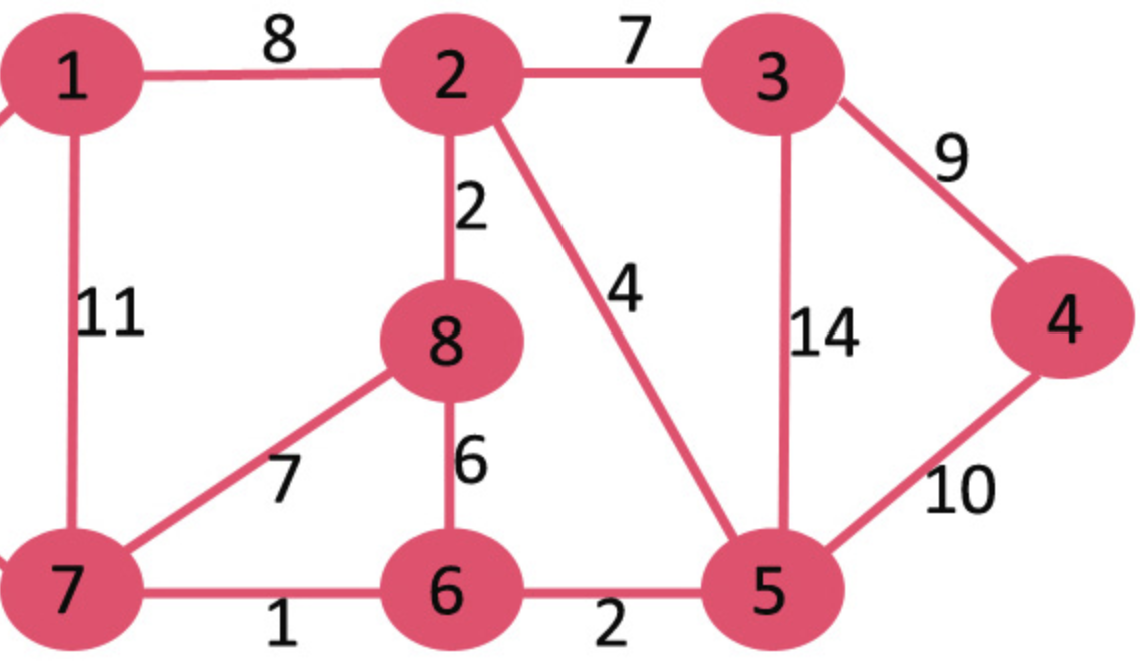

##Priority class definition and code.

In [ ]:
#implementing MIN-Heap Class
class minheap:
  def __init__(self,lis=[],func=lambda a,b:a<b):
    self.size=len(lis)
    self.arr=lis
    self.comp=func
    if(self.size!=0):
      self.buildMinHeap()

  #function to convert a given array into minheap
  def buildMinHeap(self):
    if(self.size==0):
      return
    '''
    from last non leaf node we start heapifying
    every node while moving backward in array
    '''
    lastleafidx=self.parindx(self.size-1)
    i=lastleafidx
    while(i>=0):
      self.heapifyNode(i)
      i-=1
  #function to check if heap is empty
  def isempty(self):
    return (self.size==0)
  #function to get leftchild index
  def lcindx(self,i):
    return (2*i+1)
  #function to get rightchild index
  def rcindx(self,i):
    return (2*i+2)
  #function to get parent index
  def parindx(self,i):
    return i//2-1 if i%2==0 else i//2
  #function to check if ith index is a leaf node
  def isleaf(self,i):
    return (2*i+1)>(self.size-1)
  #function to check if index is valid
  def isvalid(self,i):
    return (i<self.size)
  #function to swap values at two indexes of arr
  def swap(self,idx1,idx2):
    self.arr[idx1],self.arr[idx2]=self.arr[idx2],self.arr[idx1]
  #function to get minimum element from minheap
  def front(self):
    if(self.size==0):
      print("Heap is Empty.")
      return
    return self.arr[0]
    
  #function to heapify after delete root node
  def heapifyNode(self,i):
    if( (not self.isvalid(i)) or (self.isleaf(i))):
      return
    lidx=self.lcindx(i)
    mincidx=i
    if(self.comp(self.arr[lidx],self.arr[i])):
      mincidx=lidx
    ridx=self.rcindx(i)
    if ridx<self.size and self.comp(self.arr[ridx],self.arr[mincidx]):
      mincidx=ridx
    if(mincidx!=i):
      self.swap(mincidx,i)
      self.heapifyNode(mincidx)
  #function to insert a element into minheap
  def insert(self,val):
    self.arr.append(val)
    self.size+=1
    i=self.size-1
    while(self.parindx(i)>=0 and self.comp(self.arr[i],self.arr[self.parindx(i)])):
      self.swap(i,self.parindx(i))
      i=self.parindx(i)
  #function to delete root element from minheap
  def pop(self):
    if(self.size==0):
      print("ERROR ! (Heap is Empty)")
      return
    self.swap(0,self.size-1)
    root=self.arr.pop()
    self.size-=1
    self.heapifyNode(0)
    return root

class priority_queue(minheap):
  def __init__(self,lis=[],func=lambda a,b:a<b):
    self.size=len(lis)
    self.heap=minheap(lis,func)
  def isempty(self):
    return (self.size==0)
  #function to get size of priority queue
  def size(self):
      return self.size
  #function to access front (root{minimum element}) in priority queue
  def front(self):
    if self.size==0:
      print("Empty priority queue! (can't delete)")
      return
    return self.heap.front()
  #function to insert element in priority queue
  def push(self,val):
    self.heap.insert(val)
    self.size+=1
    # print(f"{val} inserted.")
  #function to delete root element from priority queue
  def pop(self):
    if self.size==0:
      print("Empty priority queue! (can't delete)")
      return
    root=self.heap.pop()
    # print(f"{root} popped.")
    self.size-=1
    return root

##Required functions

In [ ]:
# Required functions Definitions starts here
from math import inf
class Node(object):
  def __init__(self,val):
    self.val=val # this is value of node (node number)
    self.d=inf # d-> minimum distance in which you can reach at this node from start
    self.p=-1 #-1 representing predecessor of this node

def printGraph(g):
  print("Printing the Graph:-")
  for key in g:
    print(key.val," : [ ",end='')
    for node,w in g[key]:
      print("({0},{1}) , ".format(node.val,w),end='')
    print("]")
  print("<====================================>")

# Relax takes two node u and v and weight of edge (u,v)
def Relax(u,v,w):
    if v.d>u.d+w: #we need to Relax(update) the edge as we get a shorter path
        v.d=u.d+w
        v.p=u
        return True
    return False

# We need a comparator function to be used in our priority queue
def comp(a,b): #this comp function take two nodes as input
  return a.d<b.d

# Required functions Definitions ends here

##Dijkstra Algo code starts here

In [ ]:
# Dijkstra Algo Starts here
def Dijkstra(g,snode,NodeList,comp):
    S=[] #this contains set of vertices in final shortest path
    Q=priority_queue(NodeList,comp) # it is a min priority queue of nodes on based of node.d
    while not Q.isempty():
        u=Q.front() # Extract the node with minimum distance
        S.append(u) # Add u to S
        for v,w in g[u]:
            Relax(u,v,w)
        Q.pop() # Remove the vertex u from Q
    return S

# Dijkstra Algo ends here

##Main code Starts here

In [ ]:
# main code starts here
n=int(input("Enter the number of nodes(n) : "))
NodeList=[Node(x) for x in range(1,n+1)]

#path stores the shortest route from starting node to ith node
path=[[] for i in range(0,len(NodeList))]

# We created n nodes numbered from 1 to n
g={NodeList[x]:set() for x in range(0,n)} #g storing the graph in adjacency list representation
print("In each line Enter 3 seperated int u, v and w representing edge beetween node u and v with weight w(enter -1 to stop input)")
while True:
  str=input()
  if(str=='-1' or str=='-1 -1'):
    break
  inplis=list(map(int,str.split()))
  u,v,w=NodeList[inplis[0]-1],NodeList[inplis[1]-1],inplis[2]
  #constructing adjacency list
  g[u].add((v,w))
  g[v].add((u,w))

# Now g contains the adjacency list representation of the graph

snode=NodeList[int(input("Enter the source Node no. : "))-1]

#Set the distance of source node as 0.
snode.d=0

printGraph(g)

# running Dijkstra Algo 
ShortestPath=Dijkstra(g,snode,NodeList,comp)

# Shorting Shortest Path using index wise
ShortestPath=sorted(ShortestPath,key=lambda a: a.val)

#Printing shortest path 
print("Shortest Path distance of every node starting from node ({0}) is :-".format(snode.val))
print("Node\tShortest Distance\tShortest Route")
for node in ShortestPath:
    print(node.val,"\t  ",node.d,"\t\t\t",end='')
    # Backtracing the Shortest Path
    path=[node.val]
    while(node.p!=-1):
        path.append(node.p.val)
        node=node.p
    path.reverse()
    print(path)

# main code ends here

Enter the number of nodes(n) : 8
In each line Enter 3 seperated int u, v and w representing edge beetween node u and v with weight w(enter -1 to stop input)
1 2 8
1 7 11
2 8 2
2 3 7
2 5 4
3 4 9
3 5 14
4 5 10
5 6 2
6 7 1
6 8 6
7 8 7
-1
Enter the source Node no. : 1
Printing the Graph:-
1  : [ (2,8) , (7,11) , ]
2  : [ (8,2) , (5,4) , (1,8) , (3,7) , ]
3  : [ (5,14) , (4,9) , (2,7) , ]
4  : [ (5,10) , (3,9) , ]
5  : [ (4,10) , (6,2) , (3,14) , (2,4) , ]
6  : [ (5,2) , (8,6) , (7,1) , ]
7  : [ (8,7) , (6,1) , (1,11) , ]
8  : [ (2,2) , (6,6) , (7,7) , ]
<====================================>
Shortest Path distance of every node starting from node (1) is :-
Node	Shortest Distance	Shortest Route
1 	   0 			 [1]
2 	   8 			 [1, 2]
3 	   15 			 [1, 2, 3]
4 	   22 			 [1, 2, 5, 4]
5 	   12 			 [1, 2, 5]
6 	   12 			 [1, 7, 6]
7 	   11 			 [1, 7]
8 	   10 			 [1, 2, 8]
